In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
testesPI = ["9"]
testesSW = ["10"]
tempos = ["015", "025"]
temposExp = ["399"]
seeds = ["10"]
quantidadeIperfs = 2500
salvarGraficos = False
#0.15 ini=150 fim=250
#0.25 ini=200 fim=550
#0.35 ini=200 fim=800
iniEstavel = 200
fimEstavel = 550

In [3]:
#Carregando todos os arquivos para grafico de bloqueados
dfPI015 = []
dfPI025 = []
dfPI035 = []
dfSW015 = []
dfSW025 = []
dfSW035 = []
for i in range(len(seeds)):
    dfPI015.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_pi015/info_parimpar.txt", sep=" "))
    dfPI025.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_pi025/info_parimpar.txt", sep=" "))
    dfPI035.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_pi035/info_parimpar.txt", sep=" "))
    dfSW015.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_sw015/info_sw.txt", sep=" "))
    dfSW025.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_sw025/info_sw.txt", sep=" "))
    dfSW035.append(pd.read_csv("../Saidas/teste"+(str(i+1))+"_sw035/info_sw.txt", sep=" "))
#Carregando todos os arquivos csv

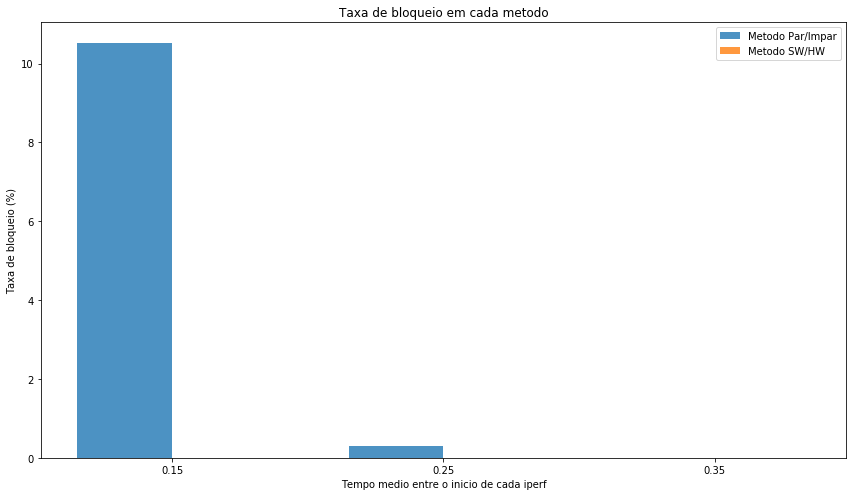

In [8]:
#Trafegos bloqueados

#Pegando a porcentagem de bloqueio em cada teste
taxaBloqueioPI015 = []
taxaBloqueioPI025 = []
taxaBloqueioPI035 = []
taxaBloqueioSW015 = []
taxaBloqueioSW025 = []
taxaBloqueioSW035 = []
#Divide por 2 porque é a quantidade de trafegos bloqueados, nao regras
for df in dfPI015:
    taxaBloqueioPI015.append(df['RegrasBloqueadas'].max())
taxaBloqueioPI015 = (np.mean(taxaBloqueioPI015)/2/float(quantidadeIperfs))*100
for df in dfPI025:
    taxaBloqueioPI025.append(df['RegrasBloqueadas'].max())
taxaBloqueioPI025 = (np.mean(taxaBloqueioPI025)/2/float(quantidadeIperfs))*100
for df in dfPI035:
    taxaBloqueioPI035.append(df['RegrasBloqueadas'].max())
taxaBloqueioPI035 = (np.mean(taxaBloqueioPI035)/2/float(quantidadeIperfs))*100

for df in dfSW015:
    taxaBloqueioSW015.append(df['VezesBloqueado'].max())
taxaBloqueioSW015 = (np.mean(taxaBloqueioSW015)/2/float(quantidadeIperfs))*100
for df in dfSW025:
    taxaBloqueioSW025.append(df['VezesBloqueado'].max())
taxaBloqueioSW025 = (np.mean(taxaBloqueioSW025)/2/float(quantidadeIperfs))*100
for df in dfSW035:
    taxaBloqueioSW035.append(df['VezesBloqueado'].max())
taxaBloqueioSW035 = (np.mean(taxaBloqueioSW035)/2/float(quantidadeIperfs))*100

listaPI = [taxaBloqueioPI015, taxaBloqueioPI025, taxaBloqueioPI035]
listaSW = [taxaBloqueioSW015, taxaBloqueioSW025, taxaBloqueioSW035]
n_groups = 3
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, listaPI, bar_width, alpha=opacity, label='Metodo Par/Impar')
rects2 = plt.bar(index + bar_width, listaSW, bar_width, alpha=opacity, label='Metodo SW/HW')

plt.xlabel('Tempo medio entre o inicio de cada iperf')
plt.ylabel('Taxa de bloqueio (%)')
plt.title('Taxa de bloqueio em cada metodo')
plt.xticks(index + bar_width/2, ('0.15', '0.25', '0.35'))
plt.legend()
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.tight_layout()
if (salvarGraficos):
    plt.savefig('taxaBloqueio.pdf')
plt.show()

In [ ]:
#Pacotes fora de ordem
a = dfServerSWHW['ForaOrdem'].tolist()
b = dfServerParImpar['ForaOrdem'].tolist()

#CDF dos pacotes fora de ordem
x = np.sort(a)
x1 = np.sort(b)

ecdf = sm.distributions.ECDF(a)
ecdf1 = sm.distributions.ECDF(b)

y = ecdf(x)
y1 = ecdf1(x1)

#HW
plt.step(x, y, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel(r'Pacotes fora de ordem metodo SW/HW')
if (salvarGraficos):
    plt.savefig('foraOrdem_teste'+numSW+'.pdf')
plt.show()

#Par impar
plt.step(x1, y1, where='post')
plt.ylabel(r'$P(X \leq x)$')
plt.xlabel(r'Pacotes fora de ordem metodo Par/Impar')
if (salvarGraficos):
    plt.savefig('foraOrdem_teste'+numParImpar+'.pdf')
plt.show()